In [2]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Directory where files are located
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
path_to_data_folder = os.path.join(parent_directory, 'Data/Processed/')

In [3]:

data_melted = pd.read_csv('data_melted_new_cat.csv')
data_melted.head()

,ID,XAI,Robot,Round,Confidence,Label,HTime,HAITime,AI_Pred,H_decision,...,overreliance,underreliance,reliance,perimeter_reliance,perimeter_o_reliance,perimeter_u_reliance,matching_decision,matching_decision_c,matching_decision_w,Reliance_Alone
0,O20,False,True,1,4,Edible,42.369080,5.783234,Edible,Edible,...,0,0,0,0,0,0,1,1,0,0
1,O21,False,True,1,8,Edible,14.602997,4.333282,Edible,Edible,...,0,0,0,0,0,0,1,1,0,0
2,O22,False,True,1,5,Edible,20.019562,13.833008,Edible,Edible,...,0,0,0,0,0,0,1,1,0,0
3,O23,False,True,1,5,Edible,38.635681,4.265717,Edible,Edible,...,0,0,0,0,0,0,1,1,0,0
4,O24,False,True,1,5,Edible,20.053207,5.449921,Edible,Edible,...,0,0,0,0,0,0,1,1,0,0


In [4]:
data_melted.columns

Index(['ID', 'XAI', 'Robot', 'Round', 'Confidence', 'Label', 'HTime',
       'HAITime', 'AI_Pred', 'H_decision', 'H__AI_decision',
       'Correct_h_decision', 'Correct_h_ai_decision', 'Correct_ai_advice',
       'dummy_reliance', 'overreliance', 'underreliance', 'reliance',
       'perimeter_reliance', 'perimeter_o_reliance', 'perimeter_u_reliance',
       'matching_decision', 'matching_decision_c', 'matching_decision_w'],
      dtype='object')

### Accuracy Score BY XAI Condition

0.029388236257643925


<Figure size 720x432 with 0 Axes>

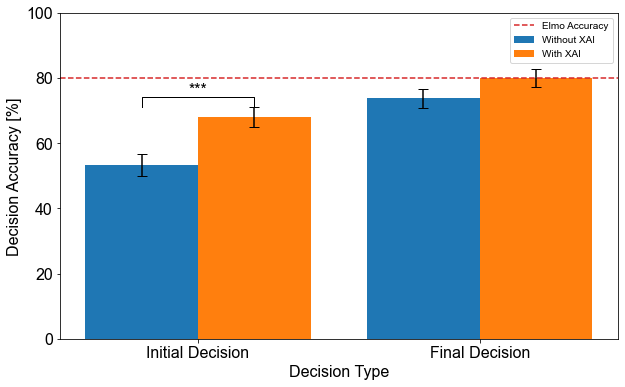

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_melted = pd.read_csv('data_melted_new_cat.csv')
def mean(data):
    return data.mean()


def sem(data):
    return data.sem()

def add_significance(ax, x1, x2, y, h=0.03, significance='*', linewidth=1, color='k'):
    """
    Add a significance bar between two x positions on the given axis.

    Parameters:
    - ax: The axis (subplot) to plot on.
    - x1, x2: The x coordinates of the two groups being compared.
    - y: The y coordinate (height) where the bar should be placed. altura
    - h: Height of the little 'bump' on the bar. width
    - significance: The string to place on the bar (e.g., '', '*', 'n.s.').
    - linewidth: The width of the line.
    - color: Color of the line and text.
    """
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], linewidth=linewidth, color=color)
    ax.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=color)



data_melted_true = data_melted[data_melted['XAI'] == True]
data_melted_false = data_melted[data_melted['XAI'] == False]

final_decision_false = data_melted_false['Correct_h_ai_decision']
final_decision_true = data_melted_true['Correct_h_ai_decision']
initial_decision_false = data_melted_false['Correct_h_decision']
initial_decision_true = data_melted_true['Correct_h_decision']

mean_final_decision_false = mean(final_decision_false)
mean_final_decision_true = mean(final_decision_true)
mean_initial_decision_false = mean(initial_decision_false)
mean_initial_decision_true = mean(initial_decision_true)

sem_final_decision_false = sem(final_decision_false)
sem_final_decision_true = sem(final_decision_true)
sem_initial_decision_false = sem(initial_decision_false)
sem_initial_decision_true = sem(initial_decision_true)

print(sem_final_decision_false)

# Create a barplot
labels = ['Initial Decision', 'Final Decision']
x = np.arange(len(labels))  # positions for each bar
x = [0, 0.5]
x1 = x[0] - 0.1
x2 = x[0] + 0.1
x3 = x[1] - 0.1
x4 = x[1] + 0.1


# Step 2: Plot the data
plt.figure(figsize=(10,6))  # Set figure size for better visualization

# bar plot with error bars, separate with colors
# initial decision
fig, ax = plt.subplots(figsize = (10, 6))
elmo_accuracy = 80
# font arial
plt.rcParams['font.family'] = 'Arial'
# font size
plt.rcParams.update({'font.size': 16})

ax.bar(x1, 100*mean_initial_decision_false, yerr=100*sem_initial_decision_false, width=0.2, color='tab:blue', linestyle = '', capsize=5, label = "Without XAI")
ax.bar(x2, 100*mean_initial_decision_true, yerr=100*sem_initial_decision_true, width=0.2, color='tab:orange', linestyle = '', capsize=5, label = "With XAI")
ax.bar(x3, 100*mean_final_decision_false, yerr=100*sem_final_decision_false, width=0.2, color='tab:blue', linestyle = '', capsize=5)
ax.bar(x4, 100*mean_final_decision_true, yerr=100*sem_final_decision_true, width=0.2, color='tab:orange', linestyle = '', capsize=5)

# add horizontal line for elmo accuracy
plt.axhline(y=elmo_accuracy, color='tab:red', linestyle='--', label = 'Elmo Accuracy')

add_significance(ax, x1 = -0.1, x2 = 0.1, significance = '***', y = 71, h = 3) # accuracy in human decision

# show labels
# font size
plt.rcParams.update({'font.size': 10})
plt.legend(loc = 'upper right')
plt.ylim(0, 100)
# font size
plt.rcParams.update({'font.size': 16})

plt.ylabel('Decision Accuracy [%]')
plt.xlabel('Decision Type')
plt.xticks(x, labels)   
plt.savefig('mean_accuracy_by_xai_conditions.pdf', dpi = 600, bbox_inches='tight')
plt.show()




### Confidence Score BY XAI Conditions



0.15174005434199225


<Figure size 720x432 with 0 Axes>

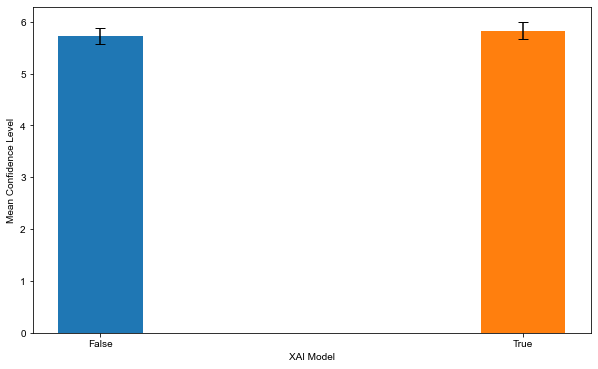

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_melted = pd.read_csv('data_melted_new_cat.csv')

# Step 2: Plot the data
plt.figure(figsize=(10,6))  # Set figure size for better visualization


def mean(data):
    return data.mean()


def sem(data):
    return data.sem()

data_melted_true = data_melted[data_melted['XAI'] == True]
data_melted_false = data_melted[data_melted['XAI'] == False]

final_decision_false = data_melted_false['Confidence']
final_decision_true = data_melted_true['Confidence']
initial_decision_false = data_melted_false['Confidence']
initial_decision_true = data_melted_true['Confidence']

mean_final_decision_false = mean(final_decision_false)
mean_final_decision_true = mean(final_decision_true)
mean_initial_decision_false = mean(initial_decision_false)
mean_initial_decision_true = mean(initial_decision_true)

sem_final_decision_false = sem(final_decision_false)
sem_final_decision_true = sem(final_decision_true)
sem_initial_decision_false = sem(initial_decision_false)
sem_initial_decision_true = sem(initial_decision_true)

print(sem_final_decision_false)

# Create a barplot
labels = ['Without XAI', 'With XAI']
x = np.arange(len(labels))  # positions for each bar
x1 = x[0]
x3 = x[1] 

# bar plot with error bars, separate with colors
# initial decision
fig, ax = plt.subplots(figsize = (10, 6))

# font arial
plt.rcParams['font.family'] = 'Arial'

ax.bar(x1, mean_initial_decision_false, yerr=sem_initial_decision_false, width=0.2, linestyle = '', capsize=5)
ax.bar(x3, mean_initial_decision_true, yerr=sem_initial_decision_true, width=0.2, linestyle = '', capsize=5)

plt.ylabel('Mean Confidence Level')
plt.xlabel('Presence of XAI')
plt.xticks(x, labels)
plt.savefig('mean_confidence_by_xai_conditions.pdf', dpi = 600, bbox_inches='tight')
plt.show()

### Confidence and Accuracy Score by Rounds 

    Round    XAI  Correct_h_ai_decision
0       1  False               1.000000
1       1   True               0.800000
2       2  False               0.733333
3       2   True               0.800000
4       3  False               1.000000
5       3   True               1.000000
6       4  False               1.000000
7       4   True               1.000000
8       5  False               0.066667
9       5   True               0.066667
10      6  False               0.800000
11      6   True               0.866667
12      7  False               0.733333
13      7   True               0.466667
14      8  False               1.000000
15      8   True               1.000000
16      9  False               0.866667
17      9   True               1.000000
18     10  False               0.200000
19     10   True               0.400000
20     11  False               0.800000
21     11   True               1.000000
22     12  False               1.000000
23     12   True               1.000000


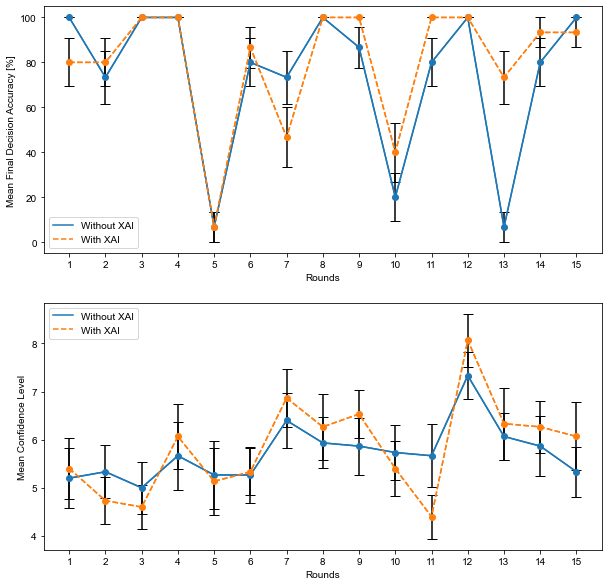

In [33]:

# Data melted by rounds, correct_h_ai_decision, confidence, and XAI
data_melted = pd.read_csv('data_melted_new_cat.csv')

# First subplot

accuracy_by_round = data_melted.groupby(['Round', 'XAI'])['Correct_h_ai_decision'].mean().reset_index()
confidence_by_round = data_melted.groupby(['Round', 'XAI'])['Confidence'].mean().reset_index()

accuracy_sem_by_round = data_melted.groupby(['Round', 'XAI'])['Correct_h_ai_decision'].sem().reset_index()
confidence_sem_by_round = data_melted.groupby(['Round', 'XAI'])['Confidence'].sem().reset_index()
print(accuracy_by_round)

accuracy_by_round_true = accuracy_by_round[accuracy_by_round['XAI'] == True]
accuracy_by_round_false = accuracy_by_round[accuracy_by_round['XAI'] == False]

confidence_by_round_true = confidence_by_round[confidence_by_round['XAI'] == True]
confidence_by_round_false = confidence_by_round[confidence_by_round['XAI'] == False]

accuracy_sem_by_round_true = accuracy_sem_by_round[accuracy_sem_by_round['XAI'] == True]
accuracy_sem_by_round_false = accuracy_sem_by_round[accuracy_sem_by_round['XAI'] == False]

confidence_sem_by_round_true = confidence_sem_by_round[confidence_sem_by_round['XAI'] == True]
confidence_sem_by_round_false = confidence_sem_by_round[confidence_sem_by_round['XAI'] == False]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
# font arial
plt.rcParams['font.family'] = 'Arial'

# bar plot with error bars, separate with colors
# accuracy
ax1.errorbar(accuracy_by_round_false['Round'], 100*accuracy_by_round_false['Correct_h_ai_decision'], yerr=100*accuracy_sem_by_round_false['Correct_h_ai_decision'], color='tab:blue',  ls='-', marker='o', capsize=5, capthick=1, ecolor='black')
ax1.errorbar(accuracy_by_round_true['Round'], 100*accuracy_by_round_true['Correct_h_ai_decision'], yerr=100*accuracy_sem_by_round_true['Correct_h_ai_decision'], color='tab:orange', marker = 'o', ls = '--', capsize=5, capthick=1, ecolor='black')
ax1.plot(accuracy_by_round_false['Round'], 100*accuracy_by_round_false['Correct_h_ai_decision'], color='tab:blue', linestyle = '-')
ax1.plot(accuracy_by_round_true['Round'], 100*accuracy_by_round_true['Correct_h_ai_decision'], color='tab:orange', linestyle = '--')

ax1.set_ylabel('Mean Final Decision Accuracy [%]')
ax1.set_xlabel('Rounds')
ax1.set_xticks(np.arange(1, 16, 1))
# Add legend for markers "s" and "P" only once
handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='Without XAI'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='With XAI'),
    ]
ax1.legend(handles=handles, loc = "lower left")

# confidence
ax2.errorbar(confidence_by_round_false['Round'], confidence_by_round_false['Confidence'], yerr=confidence_sem_by_round_false['Confidence'], color='tab:blue', ls='-', marker='o', capsize=5, capthick=1, ecolor='black')
ax2.errorbar(confidence_by_round_true['Round'], confidence_by_round_true['Confidence'], yerr=confidence_sem_by_round_true['Confidence'], color='tab:orange', marker = 'o', ls = '--', capsize=5, capthick=1, ecolor='black')
ax2.plot(confidence_by_round_false['Round'], confidence_by_round_false['Confidence'], color='tab:blue', linestyle = '-')
ax2.plot(confidence_by_round_true['Round'], confidence_by_round_true['Confidence'], color='tab:orange', linestyle = '--')

ax2.set_ylabel('Mean Confidence Level')
ax2.set_xlabel('Rounds')
ax2.set_xticks(np.arange(1, 16, 1))

# Add legend for markers "s" and "P" only once
handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='Without XAI'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='With XAI'),
    ]
ax2.legend(handles=handles, loc = "upper left")
plt.savefig('accuracy_confidence_by_rounds.pdf', dpi = 900, bbox_inches='tight')

plt.show()




### Final Decision Accuracy


    Round    XAI  Correct_h_ai_decision
0       1  False               1.000000
1       1   True               0.800000
2       2  False               0.733333
3       2   True               0.800000
4       3  False               1.000000
5       3   True               1.000000
6       4  False               1.000000
7       4   True               1.000000
8       5  False               0.066667
9       5   True               0.066667
10      6  False               0.800000
11      6   True               0.866667
12      7  False               0.733333
13      7   True               0.466667
14      8  False               1.000000
15      8   True               1.000000
16      9  False               0.866667
17      9   True               1.000000
18     10  False               0.200000
19     10   True               0.400000
20     11  False               0.800000
21     11   True               1.000000
22     12  False               1.000000
23     12   True               1.000000


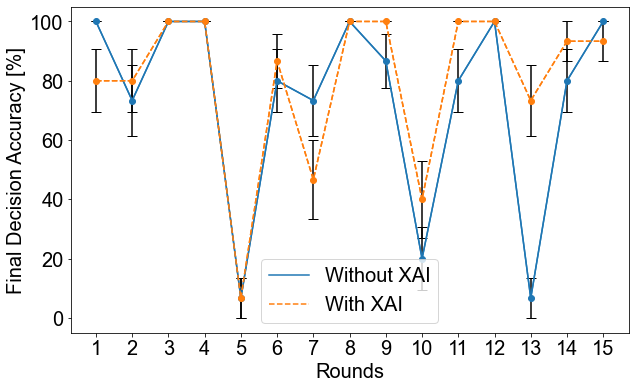

In [5]:

# Data melted by rounds, correct_h_ai_decision, confidence, and XAI
data_melted = pd.read_csv('data_melted_new_cat.csv')

# First subplot

accuracy_by_round = data_melted.groupby(['Round', 'XAI'])['Correct_h_ai_decision'].mean().reset_index()
confidence_by_round = data_melted.groupby(['Round', 'XAI'])['Confidence'].mean().reset_index()

accuracy_sem_by_round = data_melted.groupby(['Round', 'XAI'])['Correct_h_ai_decision'].sem().reset_index()
confidence_sem_by_round = data_melted.groupby(['Round', 'XAI'])['Confidence'].sem().reset_index()
print(accuracy_by_round)

accuracy_by_round_true = accuracy_by_round[accuracy_by_round['XAI'] == True]
accuracy_by_round_false = accuracy_by_round[accuracy_by_round['XAI'] == False]

confidence_by_round_true = confidence_by_round[confidence_by_round['XAI'] == True]
confidence_by_round_false = confidence_by_round[confidence_by_round['XAI'] == False]

accuracy_sem_by_round_true = accuracy_sem_by_round[accuracy_sem_by_round['XAI'] == True]
accuracy_sem_by_round_false = accuracy_sem_by_round[accuracy_sem_by_round['XAI'] == False]

confidence_sem_by_round_true = confidence_sem_by_round[confidence_sem_by_round['XAI'] == True]
confidence_sem_by_round_false = confidence_sem_by_round[confidence_sem_by_round['XAI'] == False]

fig = plt.figure(figsize=(10,6))  # Set figure size for better visualization

# font arial
plt.rcParams['font.family'] = 'Arial'
# font size
plt.rcParams.update({'font.size': 20})

# bar plot with error bars, separate with colors
# accuracy
plt.errorbar(accuracy_by_round_false['Round'], 100*accuracy_by_round_false['Correct_h_ai_decision'], yerr=100*accuracy_sem_by_round_false['Correct_h_ai_decision'], color='tab:blue',  ls='-', marker='o', capsize=5, capthick=1, ecolor='black')
plt.errorbar(accuracy_by_round_true['Round'], 100*accuracy_by_round_true['Correct_h_ai_decision'], yerr=100*accuracy_sem_by_round_true['Correct_h_ai_decision'], color='tab:orange', marker = 'o', ls = '--', capsize=5, capthick=1, ecolor='black')
plt.plot(accuracy_by_round_false['Round'], 100*accuracy_by_round_false['Correct_h_ai_decision'], color='tab:blue', linestyle = '-')
plt.plot(accuracy_by_round_true['Round'], 100*accuracy_by_round_true['Correct_h_ai_decision'], color='tab:orange', linestyle = '--')

plt.ylabel('Final Decision Accuracy [%]')
plt.xlabel('Rounds')
plt.xticks(np.arange(1, 16, 1))

# Add legend for markers "s" and "P" only once
handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='Without XAI'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='With XAI'),
    ]
plt.legend(handles=handles)

plt.savefig('final_accuracy_by_rounds.pdf', dpi = 900, bbox_inches='tight')

print(accuracy_by_round_false['Correct_h_ai_decision'])
print(accuracy_by_round_true['Correct_h_ai_decision'])


plt.show()



    Round    XAI  Correct_h_decision
0       1  False            0.800000
1       1   True            0.800000
2       2  False            0.200000
3       2   True            0.400000
4       3  False            0.666667
5       3   True            0.733333
6       4  False            0.600000
7       4   True            0.933333
8       5  False            0.333333
9       5   True            0.200000
10      6  False            0.600000
11      6   True            0.666667
12      7  False            0.133333
13      7   True            0.000000
14      8  False            0.733333
15      8   True            0.933333
16      9  False            0.600000
17      9   True            1.000000
18     10  False            0.733333
19     10   True            0.266667
20     11  False            0.333333
21     11   True            0.733333
22     12  False            0.866667
23     12   True            1.000000
24     13  False            0.400000
25     13   True            0.866667
2

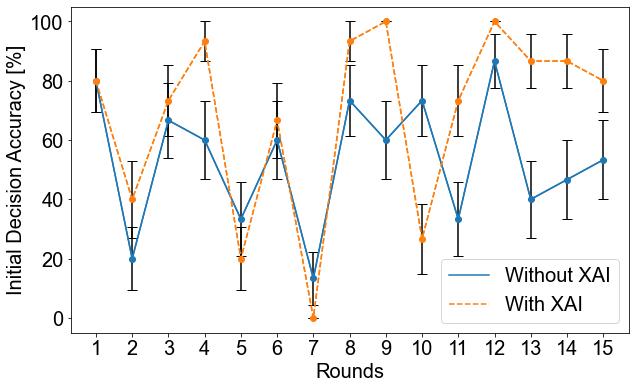

In [2]:

# Data melted by rounds, correct_h_ai_decision, confidence, and XAI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_melted = pd.read_csv('data_melted_new_cat.csv')

# First subplot

accuracy_by_round = data_melted.groupby(['Round', 'XAI'])['Correct_h_decision'].mean().reset_index()
confidence_by_round = data_melted.groupby(['Round', 'XAI'])['Confidence'].mean().reset_index()

accuracy_sem_by_round = data_melted.groupby(['Round', 'XAI'])['Correct_h_decision'].sem().reset_index()
confidence_sem_by_round = data_melted.groupby(['Round', 'XAI'])['Confidence'].sem().reset_index()
print(accuracy_by_round)

accuracy_by_round_true = accuracy_by_round[accuracy_by_round['XAI'] == True]
accuracy_by_round_false = accuracy_by_round[accuracy_by_round['XAI'] == False]

confidence_by_round_true = confidence_by_round[confidence_by_round['XAI'] == True]
confidence_by_round_false = confidence_by_round[confidence_by_round['XAI'] == False]

accuracy_sem_by_round_true = accuracy_sem_by_round[accuracy_sem_by_round['XAI'] == True]
accuracy_sem_by_round_false = accuracy_sem_by_round[accuracy_sem_by_round['XAI'] == False]

confidence_sem_by_round_true = confidence_sem_by_round[confidence_sem_by_round['XAI'] == True]
confidence_sem_by_round_false = confidence_sem_by_round[confidence_sem_by_round['XAI'] == False]

fig = plt.figure(figsize=(10,6))  # Set figure size for better visualization

# font arial
plt.rcParams['font.family'] = 'Arial'
# font size
plt.rcParams.update({'font.size': 20})

# bar plot with error bars, separate with colors
# accuracy
plt.errorbar(accuracy_by_round_false['Round'], 100*accuracy_by_round_false['Correct_h_decision'], yerr=100*accuracy_sem_by_round_false['Correct_h_decision'], color='tab:blue',  ls='-', marker='o', capsize=5, capthick=1, ecolor='black')
plt.errorbar(accuracy_by_round_true['Round'], 100*accuracy_by_round_true['Correct_h_decision'], yerr=100*accuracy_sem_by_round_true['Correct_h_decision'], color='tab:orange', marker = 'o', ls = '--', capsize=5, capthick=1, ecolor='black')
plt.plot(accuracy_by_round_false['Round'], 100*accuracy_by_round_false['Correct_h_decision'], color='tab:blue', linestyle = '-')
plt.plot(accuracy_by_round_true['Round'], 100*accuracy_by_round_true['Correct_h_decision'], color='tab:orange', linestyle = '--')

plt.ylabel('Initial Decision Accuracy [%]')
plt.xlabel('Rounds')
plt.xticks(np.arange(1, 16, 1))

# Add legend for markers "s" and "P" only once
handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='Without XAI'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='With XAI'),
    ]
plt.legend(handles=handles)

plt.savefig('initial_accuracy_by_rounds.pdf', dpi = 900, bbox_inches='tight')

print(accuracy_by_round_false['Correct_h_decision'])
print(accuracy_by_round_true['Correct_h_decision'])

# obtain mean accuracy of last 5 rounds
mean_accuracy_last_5_false = accuracy_by_round_false.tail(5)['Correct_h_decision'].mean()
mean_accuracy_last_5_true = accuracy_by_round_true.tail(5)['Correct_h_decision'].mean()
print("Mean accuracy of last 5 rounds without XAI:", mean_accuracy_last_5_false
        )
print("Mean accuracy of last 5 rounds with XAI:", mean_accuracy_last_5_true
        )


plt.show()



### Confidence Level by Reliance Groups

In [5]:
### 
# Accuracy Score Mean (XAI = TRUE, FALSE) DONE
# Accuracy Score per Round Mean (XAI=TRUE, FALSE) - Time Plot DONE 

# Confidence Level Mean (XAI = TRUE, FALSE) DONE
# Confidence per Round Mean (XAI=TRUE, FALSE) - Time Plot DONE 

# Confidence By Groups (XAI=TRUE, FALSE) 

# Data melted by rounds, correct_h_ai_decision, confidence, and XAI
import pandas as pd
data_melted = pd.read_csv('data_melted_new_cat.csv')
print(data_melted.head)

over = data_melted[data_melted.overreliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
over.replace({'Confidence':'Overreliance'}, inplace=True)

under = data_melted[data_melted.underreliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
under.replace({'Confidence':'Underreliance'}, inplace=True)

reliance = data_melted[data_melted.reliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
reliance.replace({'Confidence':'Reliance'}, inplace=True)

matching = data_melted[data_melted.matching_decision==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
matching.replace({'Confidence':'Matching Decision'}, inplace=True)

only_reliance = data_melted[data_melted.Reliance_Alone==1]['XAI', 
                                        'Confidence'].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])

only_reliance.replace({'Confidence':'Only Reliance'}, inplace=True)

# Create a barplot
labels = ['Reliance', 'Overreliance', 'Underreliance', 'Matching Decisions']
x = np.arange(len(labels))  # positions for each bar

# bar plot with error bars, separate with colors
fig, ax = plt.subplots(figsize = (10, 6))

# font arial
plt.rcParams['font.family'] = 'Arial'

x = np.arange(len(labels))  # positions for each bar
x1 = x[0] - 0.1
x2 = x[0] + 0.1
x3 = x[1] - 0.1
x4 = x[1] + 0.1
x5 = x[2] - 0.1
x6 = x[2] + 0.1
x7 = x[3] - 0.1
x8 = x[3] + 0.1

print(reliance)
mean_values = reliance['value']
print(mean_values)

ax.bar(x1, reliance['value'][0], yerr=reliance['value'][2], width=0.2, color='tab:blue', linestyle = '', capsize=5, label = 'XAI = False')
ax.bar(x2, reliance['value'][1], yerr=reliance['value'][3], width=0.2, color='tab:orange', linestyle = '', capsize=5, label = 'XAI = True')

ax.bar(x3, over['value'][0], yerr=over['value'][2], width=0.2, color='tab:blue', linestyle = '', capsize=5)
ax.bar(x4, over['value'][1], yerr=over['value'][3], width=0.2, color='tab:orange', linestyle = '', capsize=5)
ax.bar(x5, under['value'][0], yerr=under['value'][2], width=0.2, color='tab:blue', linestyle = '', capsize=5)
ax.bar(x6, under['value'][1], yerr=under['value'][3], width=0.2, color='tab:orange', linestyle = '', capsize=5)
ax.bar(x7, matching['value'][0], yerr=matching['value'][2], width=0.2, color='tab:blue', linestyle = '', capsize=5)
ax.bar(x8, matching['value'][1], yerr=matching['value'][3], width=0.2, color='tab:orange', linestyle = '', capsize=5)

plt.legend(loc = "upper right")
plt.ylabel('Mean Confidence Level')
plt.xlabel('XAI Model')
plt.xticks(x, labels)   
plt.savefig('confidence_by_decision_groups.pdf', dpi = 600, bbox_inches='tight')
plt.show()





<bound method NDFrame.head of        ID    XAI  Robot  Round  Confidence   Label      HTime    HAITime  \
0     O20  False   True      1           4  Edible  42.369080   5.783234   
1     O21  False   True      1           8  Edible  14.602997   4.333282   
2     O22  False   True      1           5  Edible  20.019562  13.833008   
3     O23  False   True      1           5  Edible  38.635681   4.265717   
4     O24  False   True      1           5  Edible  20.053207   5.449921   
..    ...    ...    ...    ...         ...     ...        ...        ...   
445  OX30   True   True     15           9  Edible   1.733307   8.150635   
446  OX31   True   True     15           7  Edible  14.232971  12.616394   
447  OX32   True   True     15           3  Edible  25.532837  17.949707   
448  OX33   True   True     15           3  Edible   6.899841  14.199646   
449  OX34   True   True     15           8  Edible  10.149719  13.316345   

    AI_Pred H_decision  ... overreliance  underreliance  

KeyError: ('XAI', 'Confidence')

### Confidence By Reliance Groups (RELIANCE ALONE)

<bound method NDFrame.head of        ID    XAI  Robot  Round  Confidence   Label      HTime    HAITime  \
0     O20  False   True      1           4  Edible  42.369080   5.783234   
1     O21  False   True      1           8  Edible  14.602997   4.333282   
2     O22  False   True      1           5  Edible  20.019562  13.833008   
3     O23  False   True      1           5  Edible  38.635681   4.265717   
4     O24  False   True      1           5  Edible  20.053207   5.449921   
..    ...    ...    ...    ...         ...     ...        ...        ...   
445  OX30   True   True     15           9  Edible   1.733307   8.150635   
446  OX31   True   True     15           7  Edible  14.232971  12.616394   
447  OX32   True   True     15           3  Edible  25.532837  17.949707   
448  OX33   True   True     15           3  Edible   6.899841  14.199646   
449  OX34   True   True     15           8  Edible  10.149719  13.316345   

    AI_Pred H_decision  ... overreliance  underreliance  

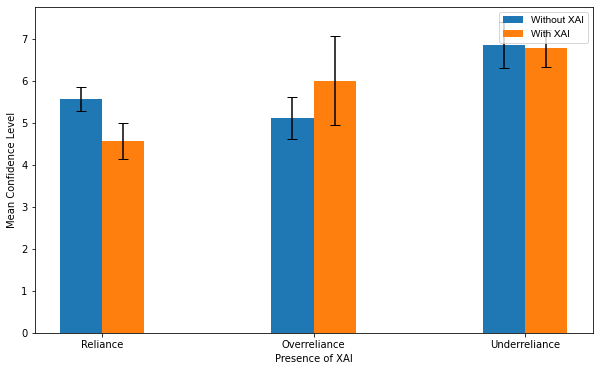

In [1]:
### 
# Accuracy Score Mean (XAI = TRUE, FALSE) DONE
# Accuracy Score per Round Mean (XAI=TRUE, FALSE) - Time Plot DONE 

# Confidence Level Mean (XAI = TRUE, FALSE) DONE
# Confidence per Round Mean (XAI=TRUE, FALSE) - Time Plot DONE 

# Confidence By Groups (XAI=TRUE, FALSE) 

# Data melted by rounds, correct_h_ai_decision, confidence, and XAI
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data_melted = pd.read_csv('data_melted_new_cat.csv')
print(data_melted.head)

over = data_melted[data_melted.overreliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
over.replace({'Confidence':'Overreliance'}, inplace=True)

under = data_melted[data_melted.underreliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
under.replace({'Confidence':'Underreliance'}, inplace=True)

reliance = data_melted[data_melted.reliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
reliance.replace({'Confidence':'Reliance'}, inplace=True)

matching = data_melted[data_melted.matching_decision==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
matching.replace({'Confidence':'Matching Decision'}, inplace=True)

print(data_melted.Reliance_Alone)

only_reliance = data_melted[data_melted.Reliance_Alone ==1][['XAI', 
                                        'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])

only_reliance.replace({'Confidence':'Only Reliance'}, inplace=True)

# Create a barplot
labels = ['Reliance', 'Overreliance', 'Underreliance']
x = np.arange(len(labels))  # positions for each bar

# bar plot with error bars, separate with colors
fig, ax = plt.subplots(figsize = (10, 6))

# font arial
plt.rcParams['font.family'] = 'Arial'

x = np.arange(len(labels))  # positions for each bar
x1 = x[0] - 0.1
x2 = x[0] + 0.1
x3 = x[1] - 0.1
x4 = x[1] + 0.1
x5 = x[2] - 0.1
x6 = x[2] + 0.1

print(reliance)
mean_values = reliance['value']
print(mean_values)

ax.bar(x1, only_reliance['value'][0], yerr=only_reliance['value'][2], width=0.2, color='tab:blue', linestyle = '', capsize=5, label = 'Without XAI')
ax.bar(x2, only_reliance['value'][1], yerr=only_reliance['value'][3], width=0.2, color='tab:orange', linestyle = '', capsize=5, label = 'With XAI')
ax.bar(x3, over['value'][0], yerr=over['value'][2], width=0.2, color='tab:blue', linestyle = '', capsize=5)
ax.bar(x4, over['value'][1], yerr=over['value'][3], width=0.2, color='tab:orange', linestyle = '', capsize=5)
ax.bar(x5, under['value'][0], yerr=under['value'][2], width=0.2, color='tab:blue', linestyle = '', capsize=5)
ax.bar(x6, under['value'][1], yerr=under['value'][3], width=0.2, color='tab:orange', linestyle = '', capsize=5)
plt.legend(loc = "upper right")
plt.ylabel('Mean Confidence Level')
plt.xlabel('Presence of XAI')
plt.xticks(x, labels)   
plt.savefig('confidence_by_decision_groups.pdf', dpi = 600, bbox_inches='tight')
plt.show()




### Confidence Levels Joined XAI with ONLY RELIANCE

<bound method NDFrame.head of        ID    XAI  Robot  Round  Confidence   Label      HTime    HAITime  \
0     O20  False   True      1           4  Edible  42.369080   5.783234   
1     O21  False   True      1           8  Edible  14.602997   4.333282   
2     O22  False   True      1           5  Edible  20.019562  13.833008   
3     O23  False   True      1           5  Edible  38.635681   4.265717   
4     O24  False   True      1           5  Edible  20.053207   5.449921   
..    ...    ...    ...    ...         ...     ...        ...        ...   
445  OX30   True   True     15           9  Edible   1.733307   8.150635   
446  OX31   True   True     15           7  Edible  14.232971  12.616394   
447  OX32   True   True     15           3  Edible  25.532837  17.949707   
448  OX33   True   True     15           3  Edible   6.899841  14.199646   
449  OX34   True   True     15           8  Edible  10.149719  13.316345   

    AI_Pred H_decision  ... overreliance  underreliance  

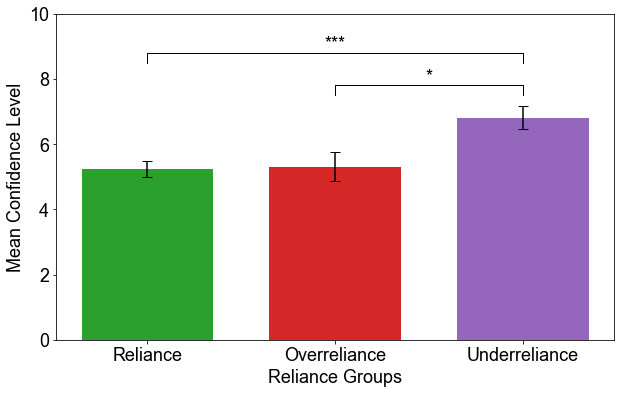

In [4]:
### 
# Accuracy Score Mean (XAI = TRUE, FALSE) DONE
# Accuracy Score per Round Mean (XAI=TRUE, FALSE) - Time Plot DONE 

# Confidence Level Mean (XAI = TRUE, FALSE) DONE
# Confidence per Round Mean (XAI=TRUE, FALSE) - Time Plot DONE 

# Confidence By Groups (XAI=TRUE, FALSE) 
import numpy as np
# Data melted by rounds, correct_h_ai_decision, confidence, and XAI
import pandas as pd
import matplotlib.pyplot as plt
data_melted = pd.read_csv('data_melted_new_cat.csv')
print(data_melted.head)

over = data_melted[data_melted.overreliance==1][['XAI',
                                          'Confidence']]
over['Metric']='Overreliance'

under = data_melted[data_melted.underreliance==1][['XAI',
                                          'Confidence']]
under['Metric']='Underreliance'

reliance = data_melted[data_melted.reliance==1][['XAI',
                                          'Confidence']]

reliance['Metric']='Reliance'
matching = data_melted[data_melted.matching_decision==1][['XAI',
                                          'Confidence']]
matching['Metric']='Matching Decisions'

only_reliance = data_melted[data_melted.Reliance_Alone==1][['XAI',
                                            'Confidence']]
only_reliance['Metric']='Only Reliance'


average_overreliance = over['Confidence'].mean()
average_underreliance = under['Confidence'].mean()
average_reliance = reliance['Confidence'].mean()
average_matching = matching['Confidence'].mean()
average_only_reliance = only_reliance['Confidence'].mean()

sem_overreliance = over['Confidence'].sem()
sem_underreliance = under['Confidence'].sem()
sem_reliance = reliance['Confidence'].sem()
sem_matching = matching['Confidence'].sem()
sem_only_reliance = only_reliance['Confidence'].sem()

def add_significance(ax, x1, x2, y, h=0.03, significance='*', linewidth=1, color='k'):
    """
    Add a significance bar between two x positions on the given axis.

    Parameters:
    - ax: The axis (subplot) to plot on.
    - x1, x2: The x coordinates of the two groups being compared.
    - y: The y coordinate (height) where the bar should be placed. altura
    - h: Height of the little 'bump' on the bar. width
    - significance: The string to place on the bar (e.g., '', '*', 'n.s.').
    - linewidth: The width of the line.
    - color: Color of the line and text.
    """
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], linewidth=linewidth, color=color)
    ax.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=color)


# Create a barplot
labels = ['Reliance', 'Overreliance', 'Underreliance']
x = np.arange(len(labels))  # positions for each bar

# bar plot with error bars, separate with colors
fig, ax = plt.subplots(figsize = (10, 6))

# font arial
plt.rcParams['font.family'] = 'Arial'
# font size
plt.rcParams.update({'font.size': 18})

x = np.arange(len(labels))  # positions for each bar
x1 = x[0] - 0.1
x2 = x[0]
x3 = x[1] - 0.1
x4 = x[1] 
x5 = x[2] - 0.1
x6 = x[2] 
ax.bar(x2, average_only_reliance, yerr = sem_only_reliance, width=0.7, color='tab:green', linestyle = '', capsize=5)
ax.bar(x4, average_overreliance, yerr = sem_overreliance, width=0.7, color='tab:red', linestyle = '', capsize=5)
ax.bar(x6, average_underreliance, yerr = sem_underreliance, width=0.7, color='tab:purple', linestyle = '', capsize=5)

add_significance(ax, x1 = 0, x2 = 2,y = 8.5, significance = '***', h = 0.3) # reliance, underreliance
add_significance(ax, x1 = 1, x2 = 2, y = 7.5, significance = '*', h = 0.3) # overreliance and underreliance

print(average_overreliance, average_underreliance, average_reliance, average_matching, average_only_reliance)
print(sem_overreliance, sem_underreliance, sem_reliance, sem_matching, sem_only_reliance)

plt.ylabel('Mean Confidence Level')
plt.xlabel('Reliance Groups')
plt.xticks(x, labels)   
plt.ylim(0, 10)
plt.savefig('confidence_by_decision_groups_both_XAI.pdf', dpi = 600, bbox_inches='tight')
plt.show()



## Confidence Levels Joined XAI

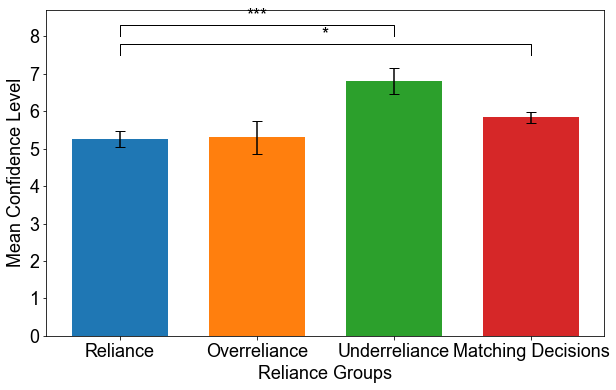

In [53]:
### 
# Accuracy Score Mean (XAI = TRUE, FALSE) DONE
# Accuracy Score per Round Mean (XAI=TRUE, FALSE) - Time Plot DONE 

# Confidence Level Mean (XAI = TRUE, FALSE) DONE
# Confidence per Round Mean (XAI=TRUE, FALSE) - Time Plot DONE 

# Confidence By Groups (XAI=TRUE, FALSE) 
import numpy as np


over = data_melted[data_melted.overreliance==1][['XAI',
                                          'Confidence']]
over['Metric']='Overreliance'

under = data_melted[data_melted.underreliance==1][['XAI',
                                          'Confidence']]
under['Metric']='Underreliance'

reliance = data_melted[data_melted.reliance==1][['XAI',
                                          'Confidence']]

reliance['Metric']='Reliance'
matching = data_melted[data_melted.matching_decision==1][['XAI',
                                          'Confidence']]
matching['Metric']='Matching Decisions'

only_reliance = data_melted[data_melted.Reliance_Alone==1][['XAI',
                                            'Confidence']]
only_reliance['Metric']='Only Reliance'


average_overreliance = over['Confidence'].mean()
average_underreliance = under['Confidence'].mean()
average_reliance = reliance['Confidence'].mean()
average_matching = matching['Confidence'].mean()
average_only_reliance = only_reliance['Confidence'].mean()

sem_overreliance = over['Confidence'].sem()
sem_underreliance = under['Confidence'].sem()
sem_reliance = reliance['Confidence'].sem()
sem_matching = matching['Confidence'].sem()
sem_only_reliance = only_reliance['Confidence'].sem()

def add_significance(ax, x1, x2, y, h=0.03, significance='*', linewidth=1, color='k'):
    """
    Add a significance bar between two x positions on the given axis.

    Parameters:
    - ax: The axis (subplot) to plot on.
    - x1, x2: The x coordinates of the two groups being compared.
    - y: The y coordinate (height) where the bar should be placed. altura
    - h: Height of the little 'bump' on the bar. width
    - significance: The string to place on the bar (e.g., '', '*', 'n.s.').
    - linewidth: The width of the line.
    - color: Color of the line and text.
    """
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], linewidth=linewidth, color=color)
    ax.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=color)


# Create a barplot
labels = ['Reliance', 'Overreliance', 'Underreliance', 'Matching Decisions']
x = np.arange(len(labels))  # positions for each bar

# bar plot with error bars, separate with colors
fig, ax = plt.subplots(figsize = (10, 6))

# font arial
plt.rcParams['font.family'] = 'Arial'

x = np.arange(len(labels))  # positions for each bar
x1 = x[0] - 0.1
x2 = x[0]
x3 = x[1] - 0.1
x4 = x[1] 
x5 = x[2] - 0.1
x6 = x[2] 
x7 = x[3] - 0.1
x8 = x[3]

ax.bar(x2, average_reliance, yerr = sem_reliance, width=0.7, color='tab:blue', linestyle = '', capsize=5)
ax.bar(x4, average_overreliance, yerr = sem_overreliance, width=0.7, color='tab:orange', linestyle = '', capsize=5)
ax.bar(x6, average_underreliance, yerr = sem_underreliance, width=0.7, color='tab:green', linestyle = '', capsize=5)
ax.bar(x8, average_matching, yerr = sem_matching, width=0.7, color='tab:red', linestyle = '', capsize=5)

add_significance(ax, x1 = 0, x2 = 2,y = 8, significance = '***', h = 0.3) # reliance, underreliance
add_significance(ax, x1 = 0, x2 = 3, y = 7.5, significance = '*', h = 0.3) # reliance and matching

plt.ylabel('Mean Confidence Level')
plt.xlabel('Reliance Groups')
plt.xticks(x, labels)   
plt.savefig('confidence_by_decision_groups_both_XAI.pdf', dpi = 600, bbox_inches='tight')
plt.show()





In [ ]:
# Step 2: Plot the data
ax = sns.barplot(data=data_melted, x='XAI', y='HTime', estimator='mean', errorbar='se', errwidth=1.5, capsize=.05)

hatches = ["//", "..."]
# Loop over the bars
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)

ax.set_ylim();
ax.set_ylabel('Human Time + (SE)');

In [ ]:
# Step 2: Plot the data
ax = sns.barplot(data=data_melted, x='XAI', y='HAITime', estimator='mean', errorbar='se', errwidth=1.5, capsize=.05)

hatches = ["//", "..."]
# Loop over the bars
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)

ax.set_ylim();
ax.set_ylabel('Human Time + (SE)');

In [ ]:
# Step 2: Plot the data
ax = sns.barplot(data=data_melted, x='XAI', y='Correct_h_decision', estimator='mean', errorbar='se', errwidth=1.5, capsize=.05)

hatches = ["//", "..."]
# Loop over the bars
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)

ax.set_ylim(0,1);
ax.set_ylabel('Mean Accuracy + (SE)')

In [ ]:
# Step 2: Plot the data
ax = sns.barplot(data=data_melted, x='XAI', y='Confidence', estimator='mean', errorbar='se', errwidth=1.5, capsize=.05)

hatches = ["//", ".."]
# Loop over the bars
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)

ax.set_ylim(0,10);
ax.set_ylabel('Mean Confidence + (SE)');

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# First subplot
sns.lineplot(data=data_melted, x='Round', y='Correct_h_ai_decision', hue='XAI', estimator='mean', errorbar=None, ax=ax1)
ax1.set_xlim(1, 15)
ax1.set_xticks(range(1, 16))  # Set x-ticks for both subplots
ax1.set_ylabel('Final Decision Accuracy')
ax1.set_yticks([0,0.5,1]);
ax1.tick_params(axis='y', labelsize=10)

# Second subplot
sns.lineplot(data=data_melted, x='Round', y='Confidence', hue='XAI', estimator='mean', errorbar=None, ax=ax2)
ax2.set_xlim(1, 15)
ax2.set_ylim(0,10)
ax2.set_xticks(range(1, 16))
ax2.set_yticks([0,2.5, 5,7.5, 10]);
ax2.set_ylabel('Mean Confidence');
ax2.tick_params(axis='y', labelsize=10)
ax2.get_legend().remove()

In [ ]:
sns.lineplot(data=data_melted, x='Round', y='HTime',hue='XAI' , estimator='mean')

In [ ]:
sns.lineplot(data=data_melted, x='Round', y='HAITime',hue='XAI' , estimator='mean')

In [21]:
over = data_melted[data_melted.overreliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
over.replace({'Confidence':'Overreliance'}, inplace=True)

under = data_melted[data_melted.underreliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
under.replace({'Confidence':'Underreliance'}, inplace=True)

reliance = data_melted[data_melted.reliance==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
reliance.replace({'Confidence':'Reliance'}, inplace=True)

matching = data_melted[data_melted.matching_decision==1][['XAI',
                                          'Confidence']].groupby(['XAI']).agg(['mean','sem']).reset_index().melt(id_vars='XAI',var_name=['Metric','Measure'])
matching.replace({'Confidence':'Matching Decision'}, inplace=True)


In [22]:
data_confidence= pd.concat([over,under,reliance, matching])
data_confidence_mean=data_confidence[data_confidence.Measure=='mean']
data_confidence_sem=data_confidence[data_confidence.Measure=='sem']

In [ ]:
sns.barplot(data=data_confidence_mean, x='XAI', y='value', hue='Metric', ci=None)

In [ ]:
sns.barplot(data=data_confidence_mean, x='Metric',hue ='XAI',  y='value')

In [ ]:
sns.barplot(data=data_confidence_mean, x='Metric', y='value')

In [ ]:
data_confidence_sem

In [ ]:
over

In [ ]:
data_melted[['overreliance', 'underreliance', 'reliance', 'matching_decision', 'XAI']].groupby('XAI').sum()

In [38]:
over = data_melted[data_melted.overreliance==1][['XAI',
                                          'Confidence']]
over['Metric']='Overreliance'

under = data_melted[data_melted.underreliance==1][['XAI',
                                          'Confidence']]
under['Metric']='Underreliance'

reliance = data_melted[data_melted.reliance==1][['XAI',
                                          'Confidence']]

reliance['Metric']='Reliance'
matching = data_melted[data_melted.matching_decision==1][['XAI',
                                          'Confidence']]
matching['Metric']='Matching Decisions'

data_confidence_spss= pd.concat([over,under,reliance, matching])

In [ ]:
data_confidence_spss

In [41]:
data_confidence_spss.to_csv('data_confidence_spss_elmo.csv', index=False)